In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv("data/creditcard.csv")#,na_values={'TotalCharges': ' '})
#data

In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
data.isnull().sum() 
# NO missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.drop(columns='Time',inplace=True)
# The time column is irrelivant for classification
#data

In [6]:
# all negative samples
data_neg = data[data['Class'] == 0]
print('Unique Values in Class of neg ',data_neg['Class'].unique())
print('Neg Rows = ',len(data_neg.index))

Unique Values in Class of neg  [0]
Neg Rows =  284315


In [7]:
# all positive samples
data_pos = data[data['Class'] == 1]
print('Unique Values in Class of pos ',data_pos['Class'].unique())
print('Pos Rows = ',len(data_pos.index))

Unique Values in Class of pos  [1]
Pos Rows =  492


In [8]:
# sample 20000 negative samples
data_neg = data_neg.sample(n = 20000,replace=False,random_state=64)
data_neg

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
270151,1.943224,0.090842,-2.136831,0.292945,1.221572,0.464903,0.133550,0.126654,0.324717,-0.573181,...,-0.152976,-0.200267,0.311210,-0.427779,-0.276794,0.432429,-0.020861,-0.044062,5.56,0
257293,2.126886,-1.120337,0.041217,-0.520921,-1.430412,0.031849,-1.538576,0.119997,0.504754,0.830863,...,-0.189583,0.053209,0.250125,-0.722406,-0.612606,0.659215,0.021936,-0.037489,10.60,0
169418,-0.855111,1.554441,-1.090769,-1.258332,0.644649,-1.620067,1.998330,-0.604248,0.777676,0.978543,...,0.031797,0.742770,-0.207420,-0.020771,-0.202246,0.090720,0.688988,0.269250,55.47,0
82930,-0.594879,0.909679,3.141558,3.065217,-0.454162,0.908065,-0.016099,0.301946,-0.250811,0.733097,...,-0.200808,-0.096989,-0.141509,0.363923,-0.108403,0.196720,0.216493,-0.066034,4.55,0
36106,0.968304,-0.385223,1.275827,1.690792,-0.895498,0.779635,-0.682291,0.483039,1.169910,-0.222930,...,-0.348501,-0.688430,0.088006,0.185025,0.314429,-0.537814,0.074234,0.022532,38.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76388,1.156199,0.213952,0.724825,1.321089,-0.436154,-0.505561,0.066605,-0.157815,0.291099,-0.218564,...,-0.242125,-0.499187,0.008127,0.413667,0.534545,-0.551859,0.045030,0.034511,27.20,0
50698,-0.308417,0.613219,2.587952,-0.078079,-0.559907,-0.245934,0.129569,-0.191836,0.189708,-0.264623,...,0.270972,1.001359,-0.230444,0.485164,-0.239198,0.490396,-0.245298,-0.188826,9.72,0
178485,-0.095379,0.306759,0.756445,1.428918,0.406452,-0.230430,0.108274,0.096447,0.567868,-0.082314,...,0.275767,1.263871,-0.313551,-0.022387,0.474816,-0.071239,0.296991,0.021181,5.28,0
180193,-0.480175,-0.254342,0.247568,-1.672921,-0.368306,-0.472012,-0.246801,0.472560,-1.202189,-0.092065,...,-0.224272,-0.484964,0.085551,-0.426869,-0.173007,0.430131,-0.201614,-0.187030,51.51,0


In [9]:
final_data = pd.concat([data_neg,data_pos],ignore_index=True)
final_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.943224,0.090842,-2.136831,0.292945,1.221572,0.464903,0.133550,0.126654,0.324717,-0.573181,...,-0.152976,-0.200267,0.311210,-0.427779,-0.276794,0.432429,-0.020861,-0.044062,5.56,0
1,2.126886,-1.120337,0.041217,-0.520921,-1.430412,0.031849,-1.538576,0.119997,0.504754,0.830863,...,-0.189583,0.053209,0.250125,-0.722406,-0.612606,0.659215,0.021936,-0.037489,10.60,0
2,-0.855111,1.554441,-1.090769,-1.258332,0.644649,-1.620067,1.998330,-0.604248,0.777676,0.978543,...,0.031797,0.742770,-0.207420,-0.020771,-0.202246,0.090720,0.688988,0.269250,55.47,0
3,-0.594879,0.909679,3.141558,3.065217,-0.454162,0.908065,-0.016099,0.301946,-0.250811,0.733097,...,-0.200808,-0.096989,-0.141509,0.363923,-0.108403,0.196720,0.216493,-0.066034,4.55,0
4,0.968304,-0.385223,1.275827,1.690792,-0.895498,0.779635,-0.682291,0.483039,1.169910,-0.222930,...,-0.348501,-0.688430,0.088006,0.185025,0.314429,-0.537814,0.074234,0.022532,38.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20487,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
20488,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
20489,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
20490,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [10]:
# bin the continuous data 

# Freedman–Diaconis' choice to calculate bin size
# choose this because less sensitive than the standard deviation to outliers in data 
def freedman_diaconis_rule(data,n):
    min_x = data.min()
    max_x = data.max()
    q1    = data.quantile(.25)
    q3    = data.quantile(.75)
    IQR   = q3 - q1
    h     = 2*IQR*np.power(n,-1/3)
    n_bins = np.ceil((max_x - min_x)/h)
    return n_bins

In [11]:
# the colums with continuous values
cont_cols = final_data.columns[:-1]

# number of samples for each colums
n = len(final_data.index)

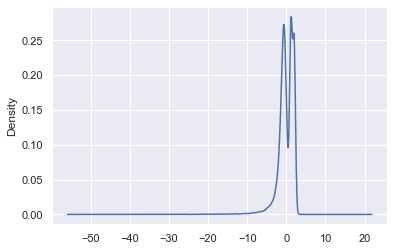

In [12]:
# compare distribution
# before
#for col in cont_cols:
final_data['V1'].plot.kde()

In [13]:
for col in cont_cols:
    # get the number of bins
    n_bins = freedman_diaconis_rule(final_data[col],n)
    
    # cur into bins and replace columns
    final_data[col] = pd.cut(final_data[col],bins=n_bins,labels=False)
    
    # see if the binning creates finite catagories
    #print(len(final_data[col].unique()))

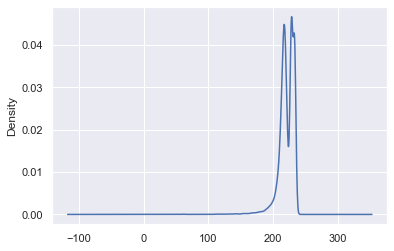

In [14]:
# compare distribution
# after
#for col in cont_cols:
final_data['V1'].plot.kde()
# similar after binning

In [15]:
final_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,233,397,200,49,245,161,525,1258,150,327,...,734,111,864,41,91,48,637,465,1,0
1,234,386,215,42,217,156,505,1258,151,346,...,733,114,862,36,84,53,640,466,2,0
2,216,412,207,36,239,137,547,1240,154,348,...,740,123,841,48,93,40,694,497,10,0
3,217,405,236,72,228,167,523,1262,143,345,...,733,112,844,55,94,42,656,463,0,0
4,227,393,223,60,223,165,515,1267,159,332,...,728,105,855,52,103,24,644,472,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20487,209,407,183,61,216,133,513,1272,123,259,...,764,109,879,43,108,56,662,485,75,1
20488,229,409,180,58,237,141,506,1261,134,291,...,751,114,844,47,107,55,670,489,0,1
20489,217,407,199,50,221,156,496,1285,139,288,...,763,124,859,49,82,49,669,490,15,1
20490,202,402,177,61,223,122,497,1281,128,263,...,758,110,831,45,90,52,709,444,47,1


In [16]:
final_data.to_csv('data/creditcard_proc.csv',index=False)